# Part A: Analysing Text Data

<font size = "3">It has seven parts of this task, and it is including the import pyspark, initialize Spark, create RDD, manipulating data set, analysis the frequency word and visulize the data.</font>


## Step 01: Import pyspark and initialize Spark

In [1]:
# Import the SparkContext, SparkConf, and SparkSession from pyspark and pyspark.sql
from pyspark import SparkContext, SparkConf 
from pyspark.sql import SparkSession

# Creating the SparkContext and checking does it have already existed
sc = SparkContext.getOrCreate()

# If there is no existing spark context, it can create a new context now
# The local[*] means that it runs Spark locally with as many working processors as logical cores on your machine
# The application name will be named "Analysis Word Frequency in the Documents" which related to this task
if (sc is None):
    sc = SparkContext(master="local[*]", appName="Analysis Word Frequency in the Documents")

spark = SparkSession(sparkContext=sc)

## Step 02: Create Resilient Distributed Datasets (RDDs)

In [2]:
# Build the readtxt function to read the txt file into RDD
def readtxt(filename):
    return sc.textFile(filename)

<font size = "3">- Creating the RDD on the first book, then counting the elements and displaying five elements on the RDD.</font>

In [3]:
# Look at the number of lines in the RDD in the first book 
first_book_rdd = readtxt('Agile Processes  in Software Engineering  and Extreme Programming.txt')
print("This book has {0} lines".format(first_book_rdd.count()))

This book has 21569 lines


In [4]:
# Have a look at 5 element on the first_book_rdd
first_book_rdd.take(5)

['LNBIP251 ', '', '', 'I Helen Sharp ', '']

<font size = "3">- Creating the RDD on the second book, then counting the elements and displaying five elements on the RDD.</font>

In [5]:
#Look at the number of lines in the RDD in the second book 
second_book_rdd = readtxt('Scrum Handbook.txt')
print("This book has {0} lines".format(second_book_rdd.count()))

This book has 4617 lines


In [6]:
# Have a look at 5 element on the first_book_rdd
second_book_rdd.take(5)

["Jeff Sutherland's ", '', 'Scrum Handbook ', '', '']

**<font size = "3">Summary : In this task, it has two things can be highlighted. Firstly, it has more the elements in the first book RDD, which has 24569 lines than the second book RDD, which has 4617 lines. Secondly, it has the number of empty elements in the RDD on the first and second books, so those empty elements will be removed in the next step.</font>**

## Step 03: Cleaning/Manipulating text

In [7]:
# Import the regular expressions
import re as re

<font size = "3">To clean and manipulate the data during this step. It will not extract the numerical data in this task because this numerical data such as the stop words which doesn't have any meaning to interprate the text analysis  . Therefore, it will use regular expression to extract the word which is the apphabets words only in this task.</font>

In [8]:
# Creating the function for cleaning or manipulating text file
def dataWrangling(eachRdd):
    character = eachRdd.flatMap(lambda rdd: re.findall(r"[a-zA-Z ]+", rdd)) #extract the alphabets words only from the element
    lowerCase = character.map(lambda cha: cha.lower()) #change the each element of rdd into lowercase character
    nonSpace = lowerCase.map(lambda spa: spa.strip()) #using the strip method to remove the spaces
    removeEmpty = nonSpace.filter(lambda empty: empty != "") #filter the empty element in the rdd
    return removeEmpty # return the cleaning line at each element

In [9]:
#Calling the function and returning whole elements in the RDD in the first book
dataWrangling(first_book_rdd).collect()

['lnbip',
 'i helen sharp',
 'tracy hall',
 'eds',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 'th international conference',
 'xp',
 'edinburgh',
 'uk',
 'may',
 'proceedings',
 'springer open',
 'lecture notes',
 'in business information processing',
 'series editors',
 'wil van der aalst',
 'eindhoven technical university',
 'eindhoven',
 'the netherlands',
 'john mylopoulos',
 'university of trento',
 'povo',
 'italy',
 'michael rosemann',
 'queensland university of technology',
 'brisbane',
 'qld',
 'australia',
 'michael j',
 'shaw',
 'university of illinois',
 'urbana',
 'champaign',
 'il',
 'usa',
 'clemens szyperski',
 'microsoft research',
 'redmond',
 'wa',
 'usa',
 'more information about this series at http',
 'www',
 'springer',
 'com',
 'series',
 'helen sharp',
 'tracy hall',
 'eds',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 'th international conference',
 'xp',
 'edinburgh',
 'uk',
 'may',
 'proceeding

In [10]:
#Calling the function and returning whole elements in the RDD in the second book
dataWrangling(second_book_rdd).collect()

['jeff sutherland',
 's',
 'scrum handbook',
 'everything',
 'you need',
 'to know',
 'to start',
 'a scrum project',
 'in your',
 'organization',
 'scrum',
 'training',
 'institute',
 'm w press',
 'this book is dedicated to nobel laureate muhammad yunus and the',
 'grameen bank for originating microenterprise development and the',
 'accion international president',
 's advisory board',
 'responsible for much of',
 'microenterprise development in the western hemisphere',
 'the strategy for bootstrapping the poor out of poverty has been',
 'a model for freeing hundreds of thousands of software developers from',
 'developer abuse caused by poor management practices',
 'thanks to the reviewers of the text who include among many others',
 'tom poppendieck',
 'hen rick kniberg',
 'rowan bunning',
 'clifford thompson',
 'about this book',
 'this manual is based on the scrum papers',
 'published by the scrum',
 'training institute',
 'see www',
 'scrumtraininginstitute',
 'com',
 'for inform

## Step 04: Transforming the Data/Counting the words

In [11]:
# Build the splitedRdd and countingWord function to split and count the words at each RDD
def splitedRdd(rdd): #spliting the words at each rdd
    splitRdd = rdd.flatMap(lambda x: x.split(" ")) #spliting each word in the rdd
    return splitRdd

def countingWord(rdd): #counting the words at each rdd
    pairRdd = rdd.map(lambda word: (word,1)) #using a transformation to convert word to a key/value pair of (word, 1)
    countWord = pairRdd.reduceByKey(lambda first, second: first+second) #counting the number of words in the rdd
    sortCountWord = countWord.sortBy(lambda value: value[1], ascending = False) #showing the descending order
    return sortCountWord

In [12]:
# Split the element at each space and count the frequency of each word to show the top 20 words
cleanRddBook1 = dataWrangling(first_book_rdd) #creating a new rdd for counting the frequency words after manipulating the element
splitRddBook1 = splitedRdd(cleanRddBook1) #spliting the words in the RDD
sortCountWordBook1 = countingWord(splitRddBook1) #counting the frequency words in the first book
print("It has {0} words in the first book.".format(sortCountWordBook1.count()))

It has 9103 words in the first book.


In [13]:
# Showing the top 20 most frequent words in the first book
sortCountWordBook1.take(20)

[('the', 8161),
 ('and', 3975),
 ('of', 3954),
 ('to', 3751),
 ('in', 3101),
 ('a', 2755),
 ('is', 1541),
 ('that', 1356),
 ('for', 1195),
 ('on', 1027),
 ('as', 1023),
 ('we', 980),
 ('with', 970),
 ('software', 931),
 ('this', 915),
 ('are', 785),
 ('agile', 784),
 ('it', 775),
 ('development', 748),
 ('was', 711)]

In [14]:
# Split the element at each space and count the frequency of each word to show the top 20 words
cleanRddBook2 = dataWrangling(second_book_rdd) #creating a new rdd for counting the frequency words after manipulating the elements
splitRddBook2 = splitedRdd(cleanRddBook2) #spliting the words in the RDD
sortCountWordBook2 = countingWord(splitRddBook2) #counting the frequency words in the second book
print("It has {0} words in the second book.".format(sortCountWordBook2.count()))

It has 2979 words in the second book.


In [15]:
sortCountWordBook2.take(20)

[('the', 1238),
 ('of', 538),
 ('and', 534),
 ('to', 478),
 ('a', 454),
 ('scrum', 399),
 ('in', 363),
 ('is', 348),
 ('team', 273),
 ('product', 233),
 ('for', 195),
 ('that', 182),
 ('it', 172),
 ('on', 149),
 ('sprint', 147),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('at', 119),
 ('are', 119)]

**<font size = "3">Summary : The result is similar with the previous step which is the first book containing more lines than the second book. It turns out the number of words on the first book greater than second book. It has 9103 and 2979 words in the first and second book, respectively. </font>**

## Step 05: Removing Stop Words

In [16]:
#install the package of NLTK(Natural Language Toolkit)
#!pip install nltk

In [17]:
import nltk as nltk #import the nltk library
from nltk.corpus import stopwords #import the stopwords from nltk.corpus package

In [18]:
# Removing Stop Words and showing the number of unique words at each book
nltkStopwords = nltk.corpus.stopwords.words("english") #stopwords from the nltk library and this is a list
broadcastStopwords = sc.broadcast(nltkStopwords) #creating the broadcast variable for stopwords

def stopwords(rdd): #filter the wordd do not the stopwords at each rdd
    nonStopwordsRdd = rdd.filter(lambda words: words not in broadcastStopwords.value)
    return nonStopwordsRdd

uniqueWordBook1 = stopwords(splitRddBook1) #filtered the words without the stopwords in the first book
totalWordBook1 = uniqueWordBook1.count() #counting the total words in the first book
setUniqueWordBook1 = set(uniqueWordBook1.collect()) #changing the data type from list to set for finding the unique words
print("It has {0} unique words in the first book.".format(len(setUniqueWordBook1))) #count the unique words on the first book

uniqueWordBook2 = stopwords(splitRddBook2) #filtered the words without the stopwords in second book
totalWordBook2 = uniqueWordBook2.count() #counting the total words in the second book
setUniqueWordBook2 = set(uniqueWordBook2.collect()) #changing the data type from list to set for finding the unique words
print("It has {0} unique words in the second book.".format(len(setUniqueWordBook2))) #count the unique words on the second book

It has 8962 unique words in the first book.
It has 2857 unique words in the second book.


## Step 06: Finding the average occurrence of a word

In [19]:
# Building the fucntion for find the average occurrence of a word
def average(uniqueSet, totalWord):
    uniqueWord = len(uniqueSet)
    average = totalWord / uniqueWord
    return round(average, 4)

In [20]:
# Counting the average occurrence of a word in the first and second book
averageBook1 = average(setUniqueWordBook1, totalWordBook1)
print("The average word occurence is {0} times.".format(averageBook1)) #the average occurrence of words on first book

averageBook2 = average(setUniqueWordBook2, totalWordBook2)
print("The average word occurence is {0} times.".format(averageBook2)) #the average occurrence of words on second book

The average word occurence is 9.0357 times.
The average word occurence is 3.8281 times.


## Step 07: Exploratory data analysis

In [21]:
#!pip install matplotlib #install the matplotlib library
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. Plotting the unique words of distribution

- <font size = "3">**Non-sampling distribtuion** </font>

In [22]:
# Preparing data for plotting
uniqueWordCountBook1 = countingWord(uniqueWordBook1) #counting the frequency of unique words on the first book
uniqueWordCountBook2 = countingWord(uniqueWordBook2) #counting the frequency of unique words on the second book

In [23]:
# Creating the dataframe and rename the column name on the unique words
Book1df = spark.createDataFrame(uniqueWordCountBook1)\
                .withColumnRenamed("_1", "Words")\
                .withColumnRenamed("_2", "Frequency")
Book1df.show() #showing the table on the top 20 unique frequency words on the first book
Book1df.printSchema() #checking the schema of the data type in the table

# Creating the dataframe and rename the column name
Book2df = spark.createDataFrame(uniqueWordCountBook2)\
                .withColumnRenamed("_1", "Words")\
                .withColumnRenamed("_2", "Frequency")
Book2df.show() #showing the table on the top 20 unique frequency words on the second book
Book2df.printSchema() #checking the schema of the data type in the table

+-----------+---------+
|      Words|Frequency|
+-----------+---------+
|   software|      931|
|      agile|      784|
|development|      748|
|       team|      592|
|       work|      461|
|    product|      459|
|    project|      372|
|      teams|      350|
| developers|      337|
|       data|      320|
|   research|      319|
|    process|      311|
|        one|      311|
|       time|      296|
|       also|      281|
|        use|      274|
|      study|      273|
|       user|      254|
|       code|      253|
|       used|      245|
+-----------+---------+
only showing top 20 rows

root
 |-- Words: string (nullable = true)
 |-- Frequency: long (nullable = true)

+-----------+---------+
|      Words|Frequency|
+-----------+---------+
|      scrum|      399|
|       team|      273|
|    product|      233|
|     sprint|      147|
|development|       98|
|    project|       93|
|      owner|       89|
|      teams|       86|
|       work|       79|
|    backlog|       74|
|   

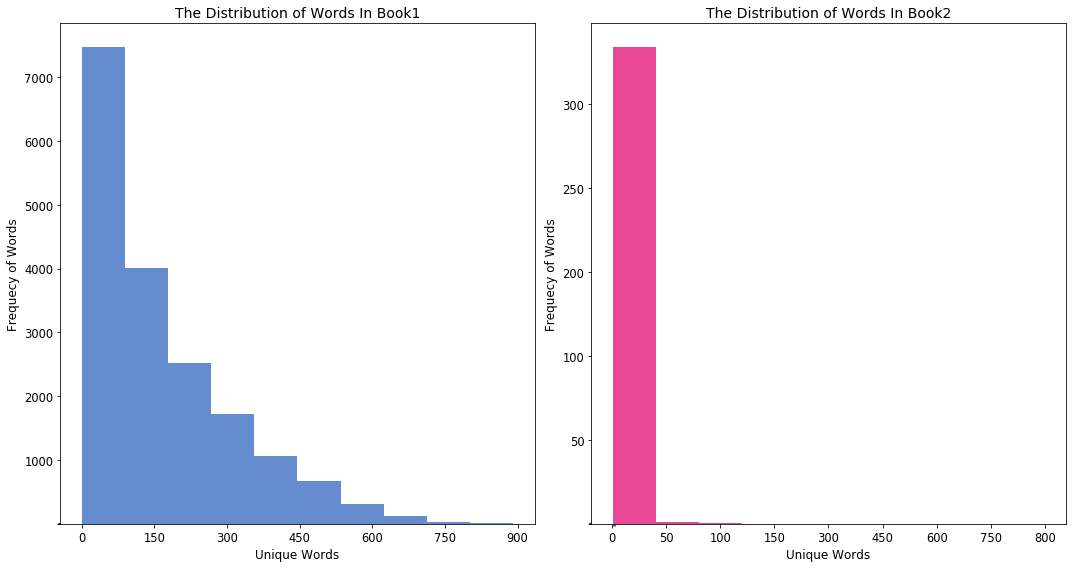

In [24]:
# Plot the distribution of the words in first and second books (non-sampling distribution)
Book1List = Book1df.collect() #converting the dataframe to the list on the first book for praparing plotting
Book2List = Book2df.collect() #converting the dataframe to the list on the second book for praparing plotting

# Setting the histogram graph for plotting distribution in first and second books
numBins = 10 #number of bins
ax1xLabel = ["0", "0", "150", "300", "450", "600", "750", "900", "1050"] #label of xaxis for ax1
ax1xRange = range(4) #range of xaxis for ax1
ax1yLabel = ["", "1000", "2000", "3000", "4000", "5000", "6000", "7000", "8000"] #label of xaxis for ax1
ax1yRange = range(5) #range of xaxis for ax1

ax2xLabel = ["0", "0", "50", "100", "150", "300", "450", "600", "750", "800", "850"] #label of xaxis for ax2
ax2xRange = range(4) #range of xaxis for ax2
ax2yLabel = ["", "50", "100", "200", "250", "300", "350"] #label of yaxis for ax2
ax2yRange = range(5) #range of yaxis for ax2

# Setting the canvas for distribution figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8), tight_layout = True)

# Preparing the data for x axis and y axis on the first and second books
yaxisBook1 = [row["Frequency"] for row in Book1List] #the data for y axis on first book
xaxisObjectBook1 = [row["Words"] for row in Book1List] #the data for x axis on first book
xaxisLenBook1 = np.arange(len(xaxisObjectBook1)) #to get the position on the x axis for label the information on the bar chart

yaxisBook2 = [row["Frequency"] for row in Book2List] #the data for y axis on second book
xaxisObjectBook2 = [row["Words"] for row in Book2List] #the data for x axis on second book
xaxisLenBook2 = np.arange(len(xaxisObjectBook2)) #to get the position on the x axis for label the information on the bar chart


# Setting the log scale to plot graph
logyaxisBook1 = np.log10(yaxisBook1) #take log 10 to scale the range of length in x axis in the first book
logyaxisBook2 = np.log10(yaxisBook2) #take log 10 to scale the range of length in x axis in the second book


# Giving data and setting the histogram chart on the first book
ax1.hist(logyaxisBook1, bins = numBins, color = "#648CCE")
ax1.set_xticks(ax1xRange, ax1xLabel)
ax1.set_xticklabels(ax1xLabel, fontsize = 11.5,)
ax1.set_yticks(ax1yRange, ax1yLabel)
ax1.set_yticklabels(ax1yLabel, fontsize = 11.5,)
ax1.set_xlabel("Unique Words", fontsize = 12)
ax1.set_ylabel("Frequecy of Words", fontsize = 12)
ax1.set_title("The Distribution of Words In Book1", fontsize = 14)

# Giving data and setting the histogram chart on the second book
ax2.hist(yaxisBook2, bins = numBins, color = "#E94994")
ax2.set_xticks(ax2xRange, ax2xLabel)
ax2.set_xticklabels(ax2xLabel, fontsize = 11.5)
ax2.set_yticks(ax2yRange, ax2yLabel)
ax2.set_yticklabels(ax2yLabel, fontsize = 11.5,)
ax2.set_xlabel("Unique Words", fontsize = 12)
ax2.set_ylabel("Frequecy of Words", fontsize = 12)
ax2.set_title("The Distribution of Words In Book2", fontsize = 14)

plt.show()

<font size = "3">Clarification : The log scale in this task is chooseing the way to use **"numpy"** package which the pacakage has containing the function **"np.log10"**. This task uses this function to return the value of distribution of frequency words after taking log10 on the y axis.</font>
    
<font size = "3">Summary : The non-sampling and sampling data distribution of frequency words on book1 and book2 are very similar. Above graph of unique words frequency distribution is the non-sampling data. According the above graphs, they have very similar shape of unique frequency words distribution on book1 and book2 which they have numerous unique words occurance between 1 to 100 times. On the other side of coin, it has less unique words occurrence around 750 or over 750 times on the book1, also the same situation happens on book2. On the book2, the unique words are seldom occurrence around 100 or exceeding 100 times. The reason is the book1 and the book2 having the significant difference from the total words volums. Therefore, even if they have the similar shape which is the right skewness but there are the different scale of the number of unique words also the freqence of unique words.</font>

- <font size = "3">**Sampling distribtuion** </font>

In [25]:
# Sampling the data from the first and second books to plot the distribution of these two graphs

sampBook1 = Book1df.sample(False, 0.1, 50) #using the simple random sampling without replacement method to do the sampling on the first book
sampBook2 = Book2df.sample(False, 0.1, 50) #using the simple random sampling without replacement method to do the sampling on the second book

print("The number of {0} sampling data on book1.".format(sampBook1.count())) #using the simple random sampling without replacement method to do the sampling on the first book
print("The number of {0} sampling data on book2.".format(sampBook2.count())) #using the simple random sampling without replacement method to do the sampling on the second book

The number of 920 sampling data on book1.
The number of 308 sampling data on book2.


<font size = "3">It uses the simple random sampling without replacement method to plot the distribution of unique words on book1 and book2, and it gets very similar result as non-sampling distribution graph. The data points are 920 and 308 on book1 and book2, respectively. Therefore, it can use the sampling data to plot the distribution of unique words because it can be more efficient and reduing the run time of plotting the huge dataset distribution, which it will return the similar result as the non-sampling distribution dataset.</font>

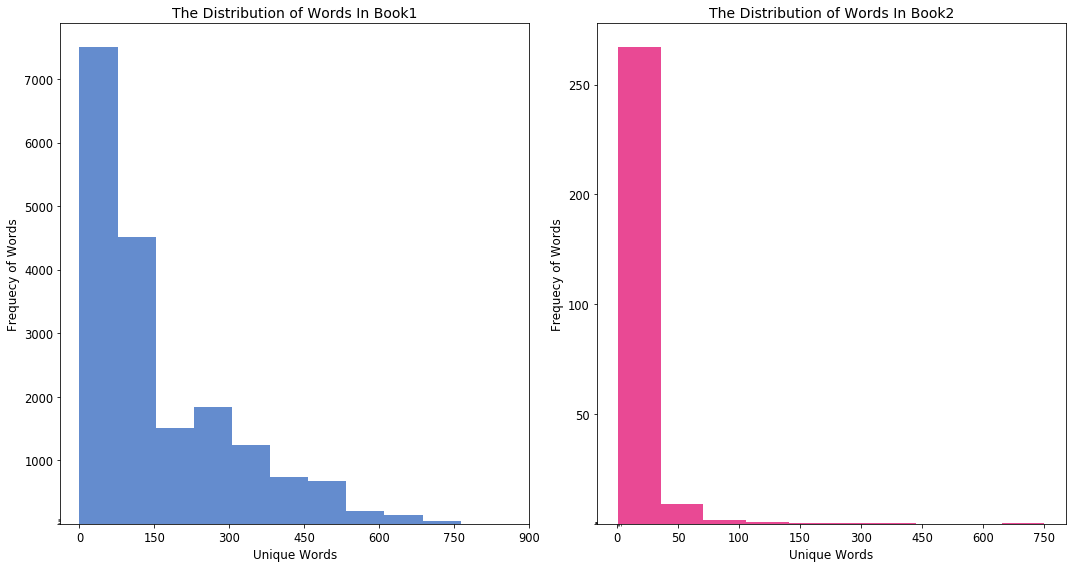

In [26]:
# Plot the distribution of the words in first and second books (sampling distribution)
Book1List = sampBook1.collect() #converting the dataframe to the list on the first book for praparing plotting
Book2List = sampBook1.collect() #converting the dataframe to the list on the second book for praparing plotting

# Setting the histogram graph for plotting distribution in first and second books
numBins = 10 #number of bins
ax1xLabel = ["0", "0", "150", "300", "450", "600", "750", "900", "1050"] #label of xaxis for ax1
ax1xRange = range(4) #range of xaxis for ax1
ax1yLabel = ["", "1000", "2000", "3000", "4000", "5000", "6000", "7000", "8000"] #label of xaxis for ax1
ax1yRange = range(5) #range of xaxis for ax1

ax2xLabel = ["0", "0", "50", "100", "150", "300", "450", "600", "750", "800", "850"] #label of xaxis for ax2
ax2xRange = range(4) #range of xaxis for ax2
ax2yLabel = ["", "50", "100", "200", "250", "300", "350"] #label of yaxis for ax2
ax2yRange = range(5) #range of yaxis for ax2

# Setting the canvas for distribution figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8), tight_layout = True)

# Preparing the data for x axis and y axis on the first and second books
yaxisBook1 = [row["Frequency"] for row in Book1List] #the data for y axis on first book
xaxisObjectBook1 = [row["Words"] for row in Book1List] #the data for x axis on first book
xaxisLenBook1 = np.arange(len(xaxisObjectBook1)) #to get the position on the x axis for label the information on the bar chart

yaxisBook2 = [row["Frequency"] for row in Book2List] #the data for y axis on second book
xaxisObjectBook2 = [row["Words"] for row in Book2List] #the data for x axis on second book
xaxisLenBook2 = np.arange(len(xaxisObjectBook2)) #to get the position on the x axis for label the information on the bar chart

# Setting the log scale to plot graph
logyaxisBook1 = np.log10(yaxisBook1) #take log 10 to scale the range of length in x axis in the first book
logyaxisBook2 = np.log10(yaxisBook2) #take log 10 to scale the range of length in x axis in the second book


# Giving data and setting the histogram chart on the first book
ax1.hist(logyaxisBook1, bins = numBins, color = "#648CCE")
ax1.set_xticks(ax1xRange, ax1xLabel)
ax1.set_xticklabels(ax1xLabel, fontsize = 11.5,)
ax1.set_yticks(ax1yRange, ax1yLabel)
ax1.set_yticklabels(ax1yLabel, fontsize = 11.5,)
ax1.set_xlabel("Unique Words", fontsize = 12)
ax1.set_ylabel("Frequecy of Words", fontsize = 12)
ax1.set_title("The Distribution of Words In Book1", fontsize = 14)

# Giving data and setting the histogram chart on the second book
ax2.hist(yaxisBook2, bins = numBins, color = "#E94994")

ax2.set_xticks(ax2xRange, ax2xLabel)
ax2.set_xticklabels(ax2xLabel, fontsize = 11.5)
ax2.set_yticks(ax2yRange, ax2yLabel)
ax2.set_yticklabels(ax2yLabel, fontsize = 11.5,)
ax2.set_xlabel("Unique Words", fontsize = 12)
ax2.set_ylabel("Frequecy of Words", fontsize = 12)
ax2.set_title("The Distribution of Words In Book2", fontsize = 14)

plt.show()

**<font size = "3">In conclusion, it has the similar distribution graph as the non-sampling dataset but it spends less time to generate the distribution figures on book1 and book2.</font>**

## 2. Plotting the top 15 common words in Book1 and Book2

In [27]:
# Preparing data for plotting the bar chart
top15WordBook1 = uniqueWordCountBook1.take(15) #display the top 15 frequency words on the first book

top15WordBook2 = uniqueWordCountBook2.take(15) #display the top 15 frequency words on the first book

print("This top 15 frequency word on first book: ")
for word in top15WordBook1:
    print(word)
    
print("========================================")

print("This top 15 frequency word on second book: ")
for word in top15WordBook2:
    print(word)

This top 15 frequency word on first book: 
('software', 931)
('agile', 784)
('development', 748)
('team', 592)
('work', 461)
('product', 459)
('project', 372)
('teams', 350)
('developers', 337)
('data', 320)
('research', 319)
('process', 311)
('one', 311)
('time', 296)
('also', 281)
This top 15 frequency word on second book: 
('scrum', 399)
('team', 273)
('product', 233)
('sprint', 147)
('development', 98)
('project', 93)
('owner', 89)
('teams', 86)
('work', 79)
('backlog', 74)
('one', 66)
('sutherland', 57)
('time', 54)
('management', 52)
('items', 52)


In [28]:
# Creating the dataframe and rename the column name
top15Book1df = spark.createDataFrame(top15WordBook1)\
                    .withColumnRenamed("_1", "Words")\
                    .withColumnRenamed("_2", "Frequency")
top15Book1df.show() #showing the table on the top 15 unique frequency words on the first book
top15Book1df.printSchema() #checking the schema of the data type in the table

# Creating the dataframe and rename the column name
top15Book2df = spark.createDataFrame(top15WordBook2)\
                    .withColumnRenamed("_1", "Words")\
                    .withColumnRenamed("_2", "Frequency")
top15Book2df.show() #showing the table on the top 15 unique frequency words on the second book
top15Book2df.printSchema() #checking the schema of the data type in the table

+-----------+---------+
|      Words|Frequency|
+-----------+---------+
|   software|      931|
|      agile|      784|
|development|      748|
|       team|      592|
|       work|      461|
|    product|      459|
|    project|      372|
|      teams|      350|
| developers|      337|
|       data|      320|
|   research|      319|
|    process|      311|
|        one|      311|
|       time|      296|
|       also|      281|
+-----------+---------+

root
 |-- Words: string (nullable = true)
 |-- Frequency: long (nullable = true)

+-----------+---------+
|      Words|Frequency|
+-----------+---------+
|      scrum|      399|
|       team|      273|
|    product|      233|
|     sprint|      147|
|development|       98|
|    project|       93|
|      owner|       89|
|      teams|       86|
|       work|       79|
|    backlog|       74|
|        one|       66|
| sutherland|       57|
|       time|       54|
| management|       52|
|      items|       52|
+-----------+---------+

root

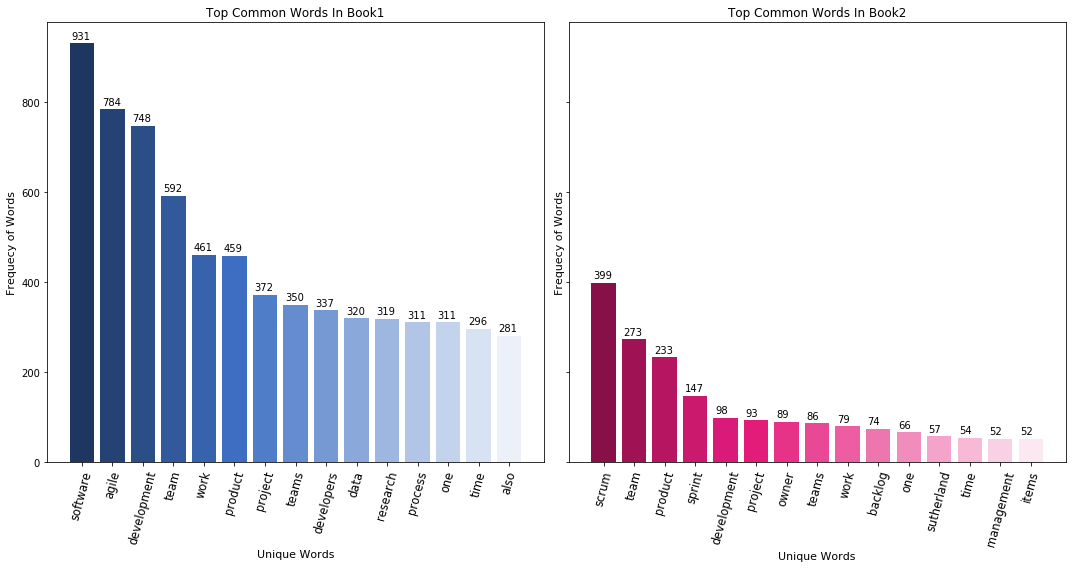

In [29]:
# Plot the top 15 most common words in first and second books
top15Book1List = top15Book1df.collect() #converting the dataframe to the list on the first book for praparing plotting bar chart
top15Book2List = top15Book2df.collect() #converting the dataframe to the list on the second book for praparing plotting bar chart

# Setting the bar chart for plotting
barWidth = 0.8


# Preparing the data for x axis and y axis on the first and second books
yAxisBook1 = [row["Frequency"] for row in top15Book1List] #the data for y axis on first book
xAxisObjectBook1 = [row["Words"] for row in top15Book1List] #the data for x axis on first book
xAxisLenBook1 = np.arange(len(xAxisObjectBook1)) #to get the position on the x axis for label the information on the bar chart

yAxisBook2 = [row["Frequency"] for row in top15Book2List] #the data for y axis on second book
xAxisObjectBook2 = [row["Words"] for row in top15Book2List] #the data for x axis on second book
xAxisLenBook2 = np.arange(len(xAxisObjectBook2)) #to get the position on the x axis for label the information on the bar chart

# Plotting the bar chart
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8), tight_layout = True, sharey = True)

# Using the differents colors map for displaying the bar chart on first and second books
colorMapBook1 = ["#1E3760", "#244274", "#2B4E87", "#31599B", "#3763AD", "#3D6EC1", "#507DC8", 
                "#648CCE", "#7699D4", "#8AA8DA", "#9EB7E0", "#B1C5E7", "#C4D3EC", "#D7E2F3", "#EBF0F9"]

colorMapBook2 = ["#881048", "#9F1355", "#B61661", "#CB196D", "#D91A79", "#E31B79", "#E63287", 
                 "#E94994", "#EC5EA1", "#EE76AE", "#F18DBC", "#F4A4CA", "#F7B9D6", "#F9D1E4", "#FCE8F1"]

# Giving data and setting the bar chart on the first book 
ax1.bar(xAxisLenBook1, yAxisBook1, barWidth, align = "center", color = colorMapBook1) 
ax1.set_xticks(xAxisLenBook1)
ax1.set_xticklabels(xAxisObjectBook1, fontsize = 11.5, rotation = 75)
ax1.set_xlabel("Unique Words", fontsize = 11)
ax1.set_ylabel("Frequecy of Words", fontsize = 11)
ax1.set_title("Top Common Words In Book1", fontsize = 12)
for x, y in zip(xAxisLenBook1, yAxisBook1):
    ax1.text(x-0.35, y+9.5, "%.0f" %y)

# Giving data and setting the bar chart on the second book 
ax2.bar(xAxisLenBook2, yAxisBook2, barWidth, align = "center", color = colorMapBook2) 
ax2.set_xticks(xAxisLenBook2)
ax2.set_xticklabels(xAxisObjectBook2, fontsize = 11.5, rotation = 75)
ax2.set_xlabel("Unique Words", fontsize = 11)
ax2.set_ylabel("Frequecy of Words", fontsize = 11)
ax2.set_title("Top Common Words In Book2", fontsize = 12)
for x, y in zip(xAxisLenBook2, yAxisBook2):
    ax2.text(x-0.35, y+9.5, "%.0f" %y)
    
plt.show()

<font size = "3">**Summary :
It has two things can point out in these two figures. Firstly, the reason to choose bar chart to visualize the data on book1 and book2 because it is easy to understand differentiation of frequency words between book1 and book2. On the other words, it is the transparent way to demenstrate the graph to communicate with audiences. Comparing with these two bar charts, it shows that it has the big gap of frequency words between book1 and book2. The top one frequecy word is software and it appreas 931 times in the book1. On the other hand, it only has 399 times happend on the top one frequency words which is scrum, but this frequency number only can be ranked to top seven frequency words on the book1 which the location is correponding on the frequency word "product".  However, some of frequency words are showing on book1 and book2 which are development, teams (team), product, project, one and time. Therefore, it might have the similar concept or topic in these two books because they have around 47% top frequency words showing on the top 15 common frequency words at both bar chart.</font>**